In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf

%matplotlib inline

In [2]:
df = pd.read_csv('20180601-asx-listed-companies.csv', header=1)

In [3]:
print (df.shape)
print (list(df))
print(df.head())

(2268, 7)
['Code', 'Company', 'Sector', 'Market Cap', 'Weight(%)', 'Unnamed: 5', 'Total Index Market Cap']
  Code              Company                      Sector   Market Cap  \
0  1PG       1-Page Limited      Information Technology   24,988,000   
1  1ST    1ST Group Limited                 Health Care    7,034,070   
2  3PL  3P Learning Limited      Consumer Discretionary  188,662,000   
3  4DS   4DS Memory Limited      Information Technology   50,053,400   
4  5GN  5G Networks Limited  Telecommunication Services   14,697,300   

  Weight(%)  Unnamed: 5 Total Index Market Cap  
0     0.001         NaN      2,064,260,493,145  
1     0.000         NaN                    NaN  
2     0.009         NaN                    NaN  
3     0.002         NaN                    NaN  
4     0.001         NaN                    NaN  


In [5]:
df['Code'][0]

'1PG'

In [7]:
for code in df['Code']:
    print (code)
    break

1PG


start
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'>


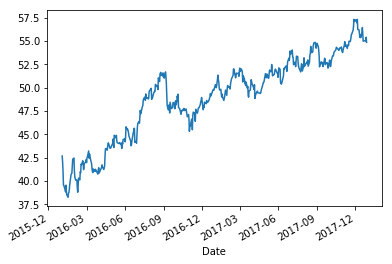

end


In [13]:
print ("start")
data = yf.download('ASX.AX','2016-01-01','2018-01-01')
print ("end downloading data")
print (type(data))
data.Close.plot()
plt.show()
print ("end")


In [14]:
print (type(data), data.shape)
print (list(data))

<class 'pandas.core.frame.DataFrame'> (505, 6)
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [ ]:
#cols available = ['Code', 'Company', 'Sector', 'Market Cap', 'Weight(%)', 'Unnamed: 5', 'Total Index Market Cap']
#cols to store in db : ['Code', 'Company', 'Sector']
